# Visualisation des anomalies

In [35]:
import pandas as pd
import numpy as np

# Plot et Display
from IPython.display import display
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sb
sb.set()
sb.set_style("darkgrid", {"axes.facecolor": ".9"})

#Lecture des données 
import pickle

In [36]:
#path_test = "../../4A/Projet/Ensemble de test/"
path_test = "../Donnees_projet/Ensemble_de_test/"

In [37]:
with open('liste_propre', 'rb') as fichier:
    mon_depickler = pickle.Unpickler(fichier)
    liste_propre, ind_recupere = mon_depickler.load()

In [38]:
def enlever_pic(serie, seuil=10, pts_moy=2, plot=False) :
    """Retire le pic final, le seuil est le plus petit accroissement considéré comme appartenant
    encore au pic. Les accroissements sont moyennés sur plusieurs points pour ne pas être sensibles 
    aux possibles irrégularités dans le pic.
    L'option plot=True permet de vérifier graphiquement le résultat.
    Retourne la liste tronquée"""
    serie = np.array(serie)
    if plot :
        plt.plot(serie)
        
    accr = abs(serie[1:] - serie[:-1])
    moy_accr = [np.mean(accr[i : i + pts_moy]) for i in range(len(accr) - pts_moy)]

    for ind, val in enumerate(moy_accr[::-1]) :
        if val < seuil and ind >= 1 :
            if plot :
                plt.plot(serie[:-ind], color="red")
                plt.show()
                
            return list(serie[:-ind])
            break
    else : 
        return serie

In [46]:
n = len(liste_propre)
liste_appr = list(np.asarray(liste_propre)[np.asarray(ind_recupere) <= 299])
liste_test = list(np.asarray(liste_propre)[np.asarray(ind_recupere) > 299])
n_appr = len(liste_appr)
n_test = len(liste_test)

In [54]:
anom = [False] * n_test
type_anom = [-1] * n_test
loc = [-1] * n_test

anom[73] = True
type_anom[73] = 1
loc[73] = 200

anom[96] = True
type_anom[96] = 1
loc[96] = 300

anom[36] = True
type_anom[36] = 1
loc[36] = 400

anom[32] = True
type_anom[32] = 1
loc[32] = 300

anom[33] = True
type_anom[33] = 1
loc[33] = 200

anom[107] = True
type_anom[107] = 2
loc[107] = 600

anom[60] = True
type_anom[60] = 2
loc[60] = 400

anom[113] = True
type_anom[113] = 2
loc[113] = 400

anom[9] = True
type_anom[9] = 2
loc[9] = 200

anom[11] = True
type_anom[11] = 2
loc[11] = 300

anom[53] = True
type_anom[53] = 3
loc[53] = 400

anom[114] = True
type_anom[114] = 3
loc[114] = 400

anom[14] = True
type_anom[14] = 3
loc[14] = 500

anom[79] = True
type_anom[79] = 3
loc[79] = 400

anom[29] = True
type_anom[29] = 3
loc[29] = 300

anom[27] = True
type_anom[27] = 4
loc[27] = 300

anom[121] = True
type_anom[121] = 4
loc[121] = 300

anom[5] = True
type_anom[5] = 4
loc[5] = 400

anom[89] = True
type_anom[89] = 4
loc[89] = 200

anom[99] = True
type_anom[99] = 4
loc[99] = 100  

anom = [False] * n_appr + anom
type_anom = [-1] * n_appr + type_anom
loc = [-1] * n_appr + loc

In [56]:
df_propre = pd.DataFrame(data={"id" : ind_recupere, "valeurs" : liste_propre,
                               "anom" : anom, "type" : type_anom, "loc" : loc}).set_index(["id"])
data_ajout_anom = df_propre[df_propre["anom"]]

df_supervise= pd.concat([df_propre,data_ajout_anom,data_ajout_anom,data_ajout_anom,data_ajout_anom])
df_supervise.tail(50)

,valeurs,anom,type,loc
id,,,,
360,"[1432.0, 1424.0, 1424.0, 1432.0, 1432.0, 1424....",True,2,400
373,"[1432.0, 1432.0, 1432.0, 1440.0, 1448.0, 1448....",True,1,200
379,"[1408.0, 1408.0, 1408.0, 1416.0, 1408.0, 1400....",True,3,400
389,"[1408.0, 1408.0, 1416.0, 1416.0, 1408.0, 1392....",True,4,200
396,"[1400.0, 1400.0, 1408.0, 1408.0, 1424.0, 1424....",True,1,300
399,"[1456.0, 1456.0, 1456.0, 1456.0, 1456.0, 1448....",True,4,100
407,"[1464.0, 1464.0, 1456.0, 1456.0, 1456.0, 1456....",True,2,600
413,"[1400.0, 1400.0, 1400.0, 1400.0, 1384.0, 1384....",True,2,400
414,"[1400.0, 1400.0, 1392.0, 1392.0, 1392.0, 1400....",True,3,400


In [57]:
def plot_anom_type(Type):
    for num in range(128):
        TS = data_anom.loc[num]
        loc = TS["loc"]
        serie = TS["valeurs"]

        if TS["type"] == Type: 
            fig, ax = plt.subplots(figsize=(12, 7))
            plt.title("Série numéro " + str(num) + ", type " + str(Type), size=20, color='r', fontweight='bold')

            ax.plot(range(loc), serie[: loc], 'b')
            ax.plot(range(loc - 1, loc + 56), serie[loc - 1 : loc + 56], 'r')
            ax.plot(range(loc + 55, len(serie)), serie[loc + 55 :], 'b')

        plt.show()

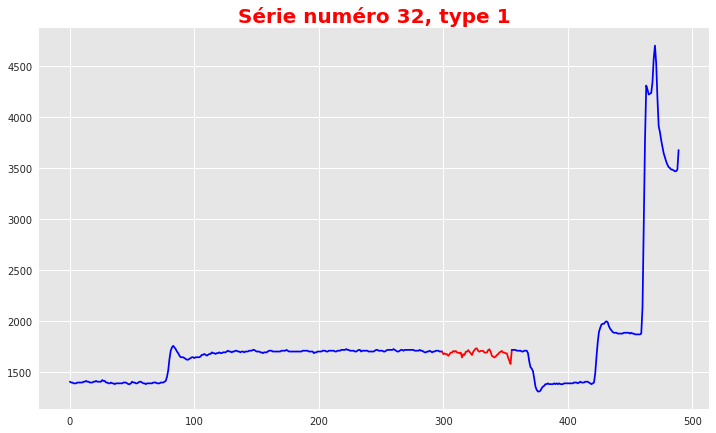

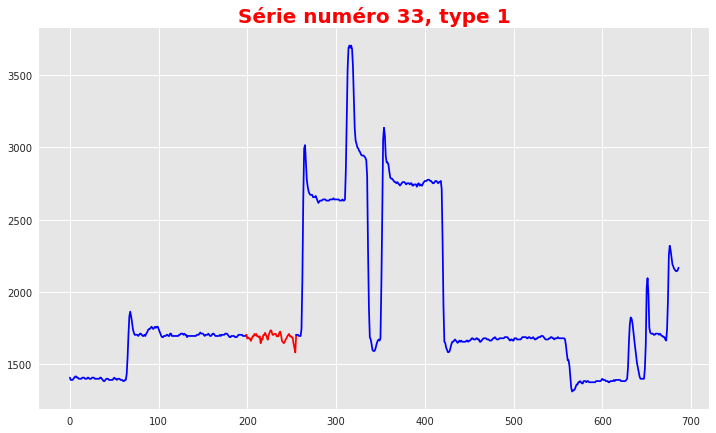

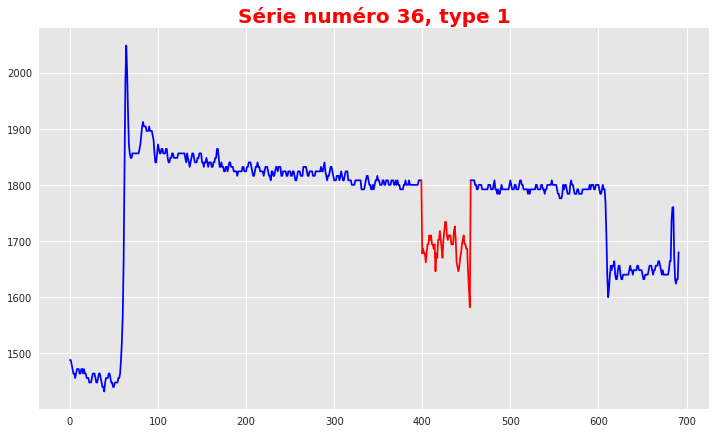

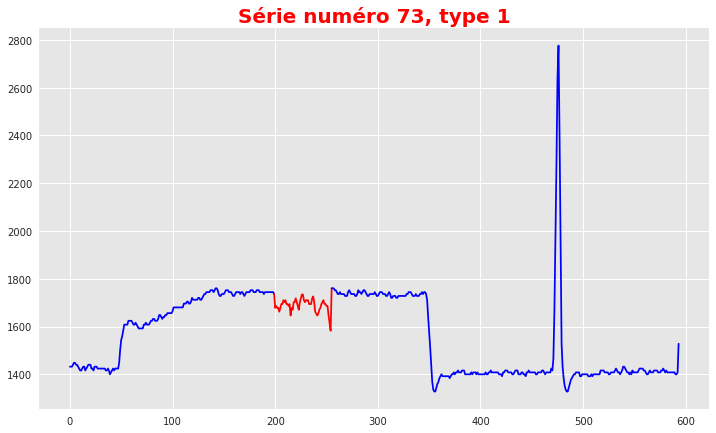

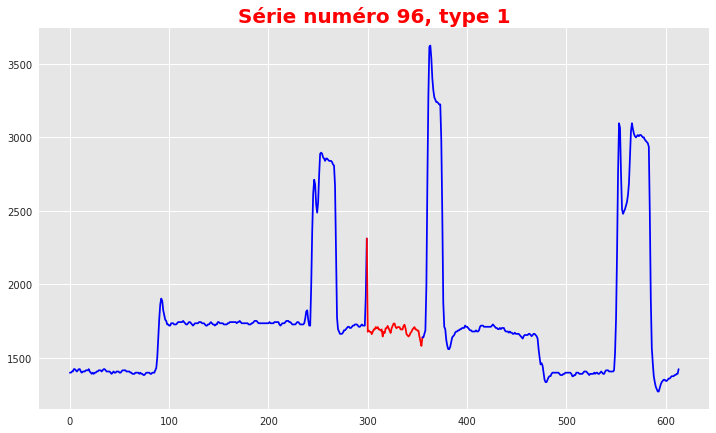

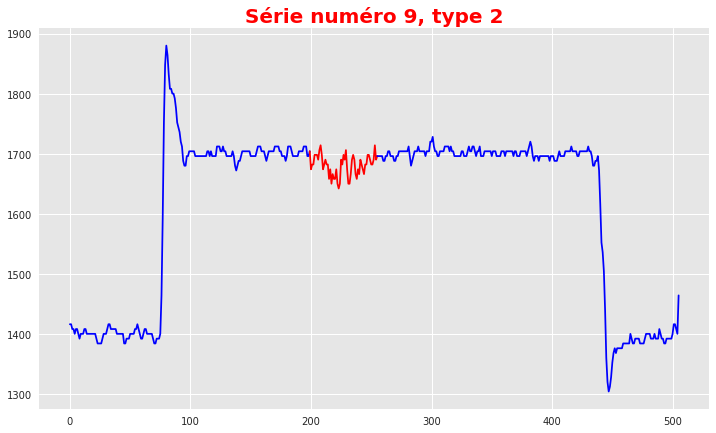

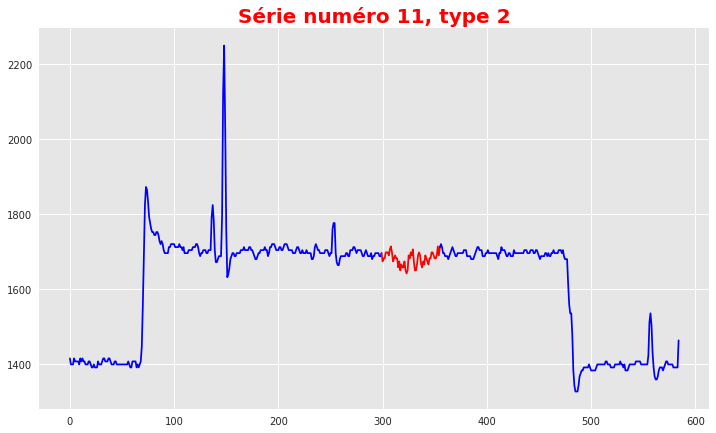

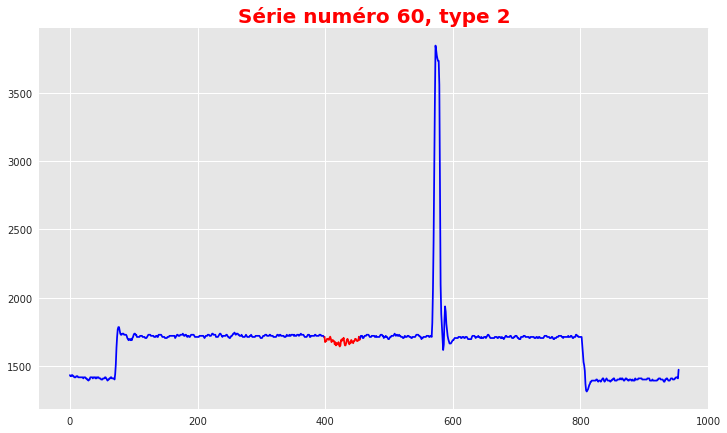

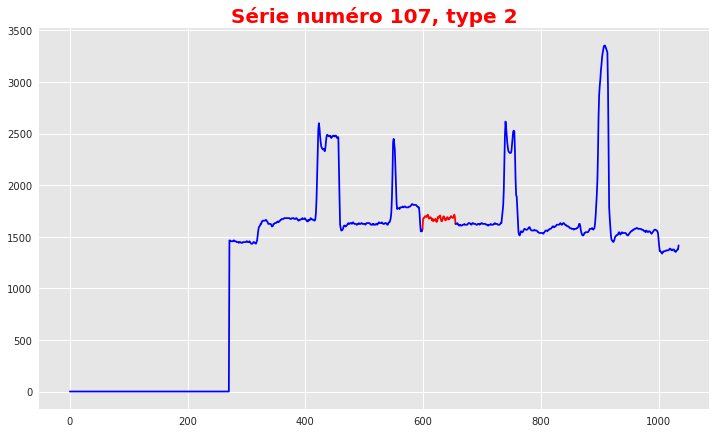

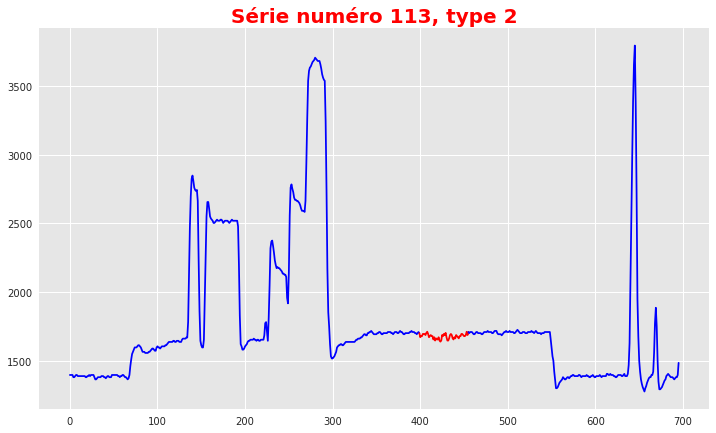

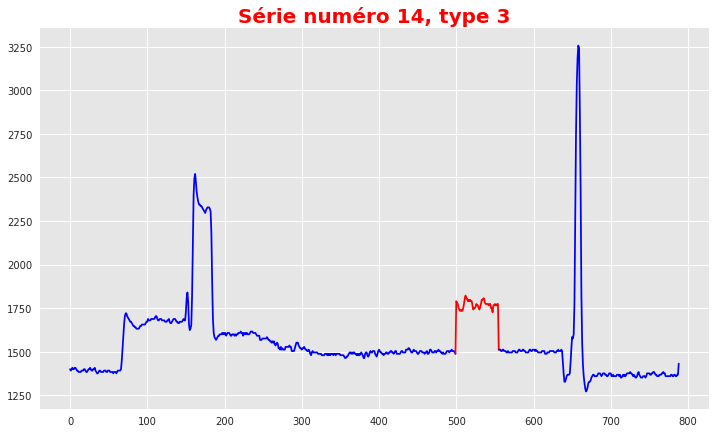

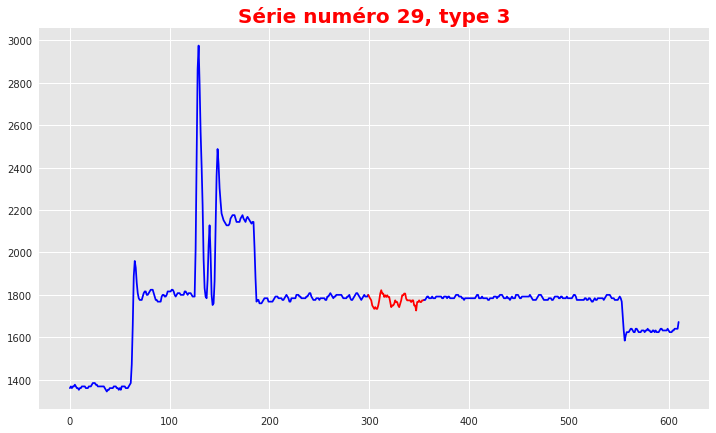

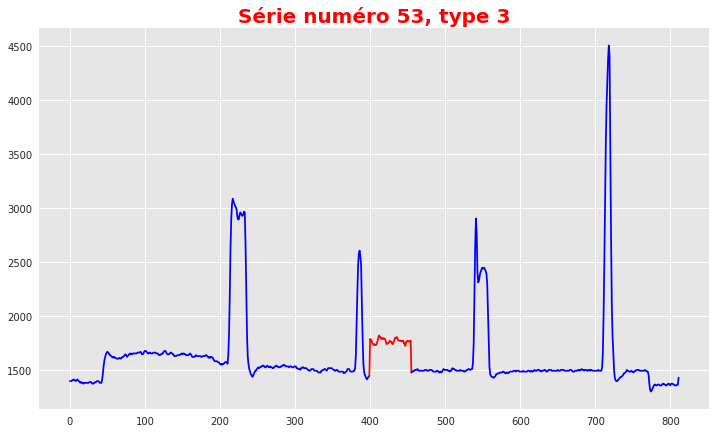

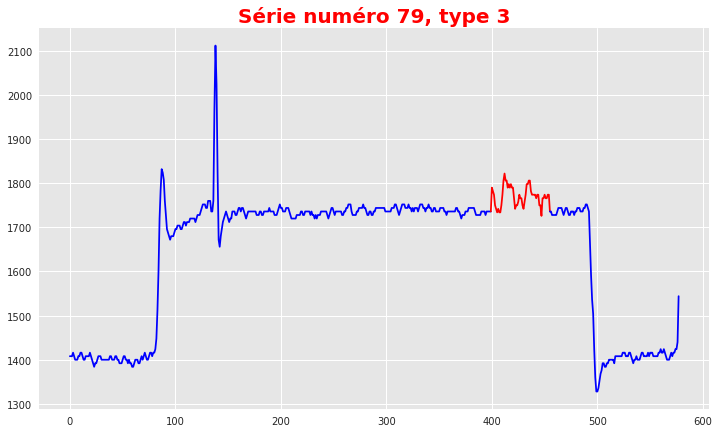

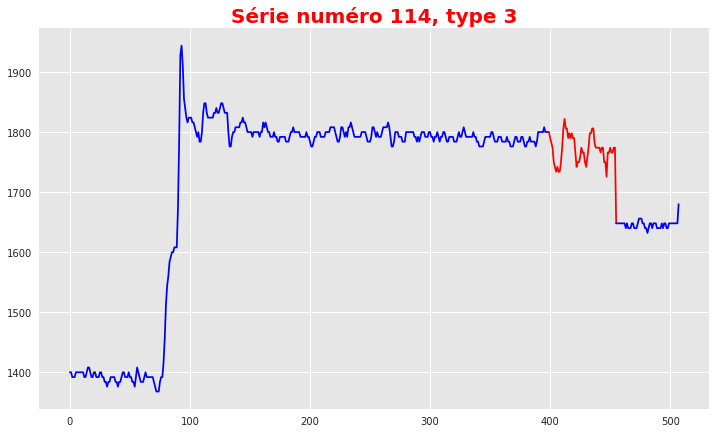

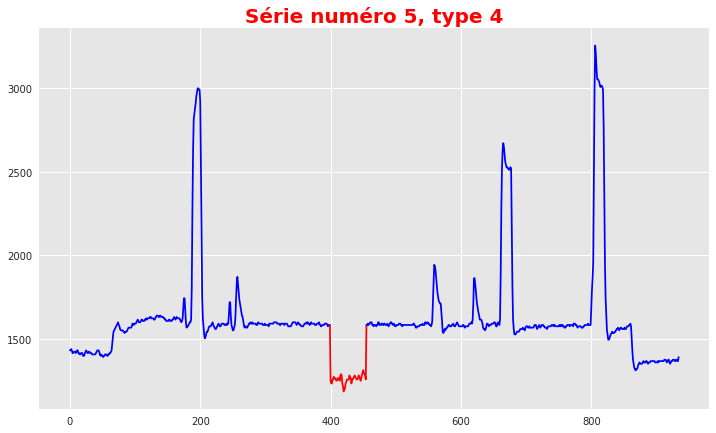

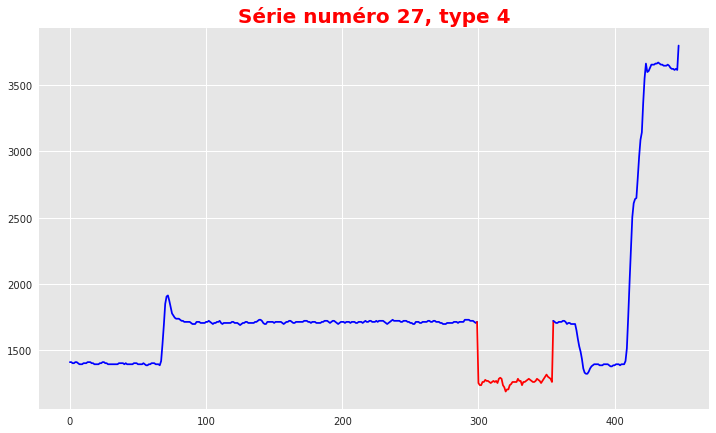

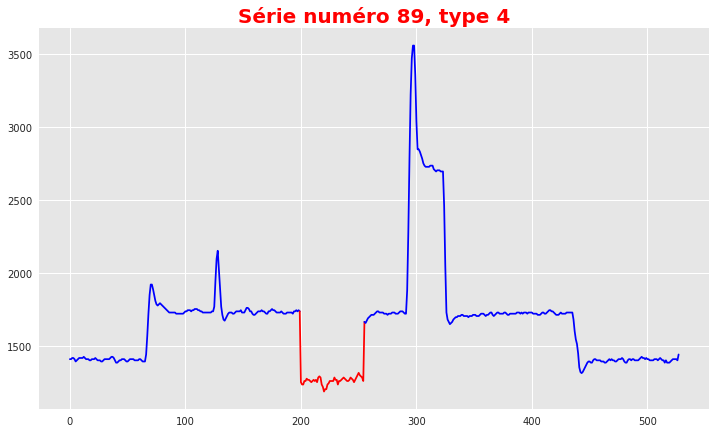

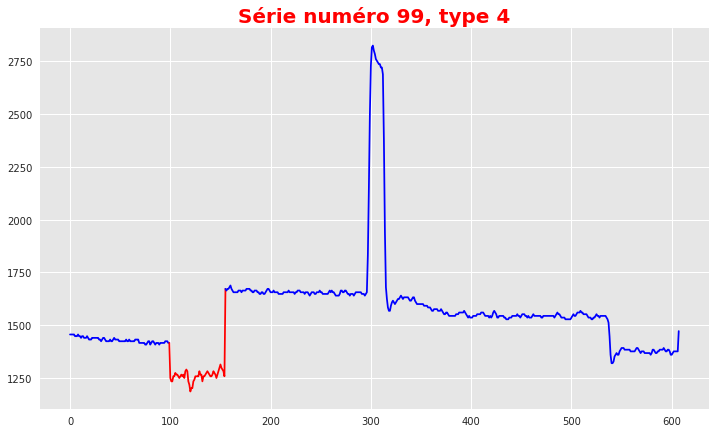

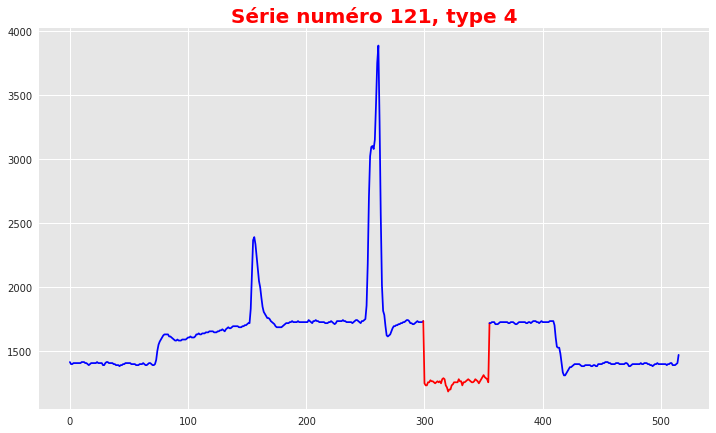

In [58]:
for T in range(1, 5):
    plot_anom_type(T)

## 3 - Méthodes de Classification

## Random Forest

In [59]:
from sklearn.model_selection import train_test_split  
X_train, X_test, Yb_train, Yb_test = train_test_split(df_supervise, Yb, test_size=200, random_state=11)
X_train, X_test, Yr_train, Yr_test = train_test_split(dfC, Yr, test_size=200, random_state=11)

NameError: name 'dfC' is not defined

In [29]:
from sklearn.ensemble import RandomForestClassifier 
# définition des paramètres
forest = RandomForestClassifier(n_estimators=500, 
   criterion='gini', max_depth=None,
   min_samples_split=2, min_samples_leaf=1, 
   max_features='auto', max_leaf_nodes=None,
   bootstrap=True, oob_score=True)
# apprentissage
rfFit = forest.fit(Xr_train,Yb_train)
print(1-rfFit.oob_score_)


/usr/local/insa/anaconda/lib/python3.6/site-packages/sklearn/ensemble/weight_boosting.py:29: DeprecationWarning: numpy.core.umath_tests is an internal NumPy module and should not be imported. It will be removed in a future NumPy release.
  from numpy.core.umath_tests import inner1d


NameError: name 'Xr_train' is not defined